# 분류 성능 평가 지표
    - 정확도 (Accuracy)
    - 오차행렬 (Confusion Matrix)
    - 정밀도 (Precision)
    - 재현율 (Recall)
    - F1 스코어
    - ROC AUC

1. 정확도
    - 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
    - 직관적으로 모델 예측 성능을 나타내는 평가지표
    - 하지만, 이진 분류의 경우 데이터의 구성에 따라 ML모델의 성능을 왜곡할 수 있기 때문에
      정확도 수치 하나만 가지고 성능을 평가하지 않는다. (Ex. 신용카드 부정거래 10%, 정상 90%)
    - 즉, 불균형한 레이블 값 분포에서 ML모델의 성능을 판단할 경우, 적합한 평가지표가 아니다.
    
2. 오차 행렬
    - 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
    - ---------------------------예측 클래스
    - 실제 클래스--Negative(0)--------Positive(1)
    - Negative(0)-----TN------------------FP
    - Positive(1)------FN------------------TP
    
3. 정밀도(Precision)
    - 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻함
    - TP / (FP + TP)
    - 정밀도를 높이려면 FP가 낮아야 한다.
    - FP: Positve로 예측했는데 실제로 Negative인 경우 >> FP를 낮다는 건 Positive에 대한 예측이 높다는 것
    
4. 재현율(Recall)
    - 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻함
    - TP / (FN + TP)
    - 재현율을 높이려면 FN이 낮아져야 한다.
    - FN: Negative로 예측했는데 실제로 Positive인 경우 >> FN를 낮다는 건 실제 값 Positive인 것이 틀리면 안된다는 것

## Accuracy: 정확도 Example

In [32]:
from IPython.display import Image

import numpy as np
from sklearn.base import BaseEstimator
import os 
import pandas as pd

In [2]:
class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    
    # predict() 메서드는 단순히 Sex feature가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [3]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("train.csv")
y_df = df['Survived']
x_df = df.drop('Survived', axis=1)
x_df = transform_features(x_df)
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print("Dummy Classifier의 정확도는: {0:.4f}".format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    
    # predict() 메서드는 단순히 Sex feature가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
    
# 사이킷런의 내장 데이터 셋인 load_digits()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape: ", digits.data.shape)
print(digits.target)
print("### digits.target.shape: ", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape:  (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape:  (1797,)


In [6]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False로 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [7]:
# 불균형한 레이블 데이터 분포도 확인
print("레이블 테스트 셋 크기: ", y_test.shape)
print("테스트 셋 레이블 0과 1의 분포도")
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print("모든 예측을 0으로 하여도 정확도는:{0:.3f}".format(accuracy_score(y_test, fakepred)))

레이블 테스트 셋 크기:  (450,)
테스트 셋 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


## Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과 y_test의 Confusion Matrix 출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## 정밀도(Precision) & 재현율 (Recall)

### MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("정밀도: ", precision_score(y_test, fakepred))
print("재현율: ", recall_score(y_test, fakepred))

정밀도:  0.0
재현율:  0.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print("오차 행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}".format(accuracy, precision, recall))

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터 재로딩, 데이터 가공, train/test 분할
df = pd.read_csv("train.csv")
y_df = df['Survived']
x_df = df.drop('Survived', axis=1)
x_df = transform_features(x_df)

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 재현율이 상대적으로 더 중요한 지표인 경우
- 실제 positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 암 진단, 금융사기 판별과 같은 case

#### 정밀도가 상대적으로 더 중요한 지표인 경우
- 실제 Negative음성인 데이터 예측을 Positive양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 스팸메일

#### * 불균형한 레이블 클래스를 가지는 이진분류모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positve를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0값을 부여합니다.

#### 재현율이 좀 더 좋아야하는데? 정밀도가 더 좋아야 하는데? 의 관점 >> 임곗값 Threshold
- 정밀도와 재현율은 상호보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.
- 이를 정밀도와 재현율의 Trade off 관계

분류 결정 임곗값이 낮아질 수록 Positive로 예측할 확률이 높아진다. >> 재현율 증가
- 예측할 확률이 왜 높아지냐? 임곗값이 낮아질수록 Positive일 확률이 높아지고 그에따라
  FP값은 커져 정밀도는 작아지며, FN값은 작아져 재현율 값은 커진다는 말이다.
- 사이킷런 Estimator객체의 predict_proba() 메서드는 분류 결정 예측 확률을 반환
- 이를 이요하면 임의로 분류 결정 임곗값을 조정하면서 예측 확률을 변경할 수 있다.

#### precision_recall_curve()
정밀도-재현율 곡선을 통해 임곗값에 따른 정밀도, 재현율의 변화값 제공

## Precision/Recall Trade-off

#### predict_proba 메서드 확인
   - 0과 1로 예측한 확률값

In [12]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print("pred_proba()결과 Shape: {0}".format(pred_proba.shape))
print("pred_proba array에서 앞 3개만 샘플로 추출 \n:", pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 concatenate하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print("두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n", pred_proba_result[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46214778 0.53785222]
 [0.87866165 0.12133835]
 [0.87720083 0.12279917]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46214778 0.53785222 1.        ]
 [0.87866165 0.12133835 0.        ]
 [0.87720083 0.12279917 0.        ]]


#### Binarizer 활용

In [13]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1) # threshold 기준값보다 같거나 작으면 0을 반환
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


#### 분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환

In [14]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값.
custom_threshold = 0.5

# predict_proba()의 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


#### 분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환

In [15]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값.
custom_threshold = 0.4

# predict_proba()의 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


재현율이 높아졌고, 정밀도는 낮아졌다.

#### 여러 개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 변환

In [16]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체내의 값을 차례로 iteration하면서 Evalutaion 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


임곗값이 커질수록 재현율은 떨어지고 정밀도는 올라간다.  

#### precision_recall_curve()를 이용하여 임곗값에 따른 정밀도-재현율 값 추출

In [17]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("반환된 분류 결정 임계값 배열의 Shape: ", thresholds.shape)
print("반환된 precisions 배열의 Shape: ", precisions.shape)
print("반환된 recalls 배열의 Shape: ", recalls.shape)

print("thresholds 5 sample: ", thresholds[:5])
print("precisions 5 sample: ", precisions[:5])
print("recalls 5 sample: ", recalls[:5])

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print("샘플 추출을 위한 임곗값 배열의 index 10개", thr_index)
print("샘플용 10개의 임곗값: ", np.round(thresholds[thr_index], 2))

# 15 Step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print("샘플 임계값별 정밀도: ", np.round(precisions[thr_index], 3))
print("샘플 임계값별 재현율: ", np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 Shape:  (143,)
반환된 precisions 배열의 Shape:  (144,)
반환된 recalls 배열의 Shape:  (144,)
thresholds 5 sample:  [0.10391787 0.10392009 0.10394503 0.10776498 0.10889543]
precisions 5 sample:  [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample:  [1.         0.98360656 0.98360656 0.98360656 0.96721311]
샘플 추출을 위한 임곗값 배열의 index 10개 [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


#### 임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림

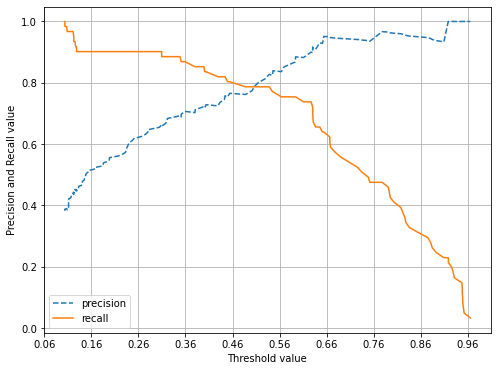

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threhold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label="precision")
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threhold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

#### 정밀도를 100%로 만드는 법
   - 확실한 기준이 되는 경우 Positive로 예측하고, 나머지는 모두 Negative로 예측
   - 정밀도 = TP / (TP+FP)입니다.
   - 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면, 이 한 명만 Positive로 예측하고 나머지는 모두 Negative로 예측하더라도, FP는 0, TP는 1이 되므로 정밀도는 1/1 즉, 100%가 됩니다.
   
#### 재현율을 100%로 만드는 법
   - 모든 환자를 Positive로 예측하면 된다.
   - 재현율 = TP / (TP + FN)
   - 전체 환자 1000명을 다 Positive로 예측하는 겁니다.
   - 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고, FN은 아예 0이므로 30/30으로 100%가 됩니다.

### F1 Score
![F1score](https://user-images.githubusercontent.com/63237947/104834091-9c1d0c00-58e0-11eb-99ea-c6bb341cb820.png)
   - F1 Score는 정밀도와 재현율을 결합한 지표
   - 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다.
   - 만일 A예측모델의 경우 정밀도 0.9, 재현율이 0.1로 극단적인 차이가 나고, B 예측모델의 경우, 정밀도가 0.5, 재현율 0.5로 정밀도와 재현율의 큰 차이가 없다면 각각의 F1 스코어는 0.18, 0.5로 B모델이 우수한 F1 Score를 가집니다.

### ROC곡선과 AUC
<img src="https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-05-ROC/pic1.png" alt="Drawing" style="width: 400px;"/>
  
   - ROC곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
   - 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표
   - ROC 곡선은 FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선
   - FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화 곡선형태로 나타난다.
   - 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정
   - AUC값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치이다.
   - TPR은 True Positve Rate의 약자이며, 재현율을 나타낸다. 민감도라고도 부른다.
   - 따라서 TPR은 TP / (FN+TP)이다.
   - FPR은 실제 Negative(음성)을 잘못 예측한 비율을 나타낸다.
   - FPR = FP / (FP + TN) Negative로 예측한 전체 중에 Negative인데 Positive로 예측한 비율

### F1 score

In [19]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print("F1 스코어ㅣ {0:4f}".format(f1))

F1 스코어ㅣ 0.780488


In [24]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print("오차 행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}".format(accuracy, precision, recall, f1))

In [26]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1:0.7727
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036


참고) F1 스코어를 보고 판단하기엔 재현율이 너무 낮음.

### ROC Curve와 AUC

In [28]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추측
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 5)
print("샘플 추출을 위한 임곗값 배열의 index 10개: ", thr_index)
print("샘플용 10개의 임곗값: ", np.round(thresholds[thr_index], 2))

# 5 Step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print("샘플 임곗값 별 FPR: ", np.round(fprs[thr_index],3))
print("샘플 임곗값 별 TPR: ", np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개:  [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
샘플 임곗값 별 FPR:  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임곗값 별 TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


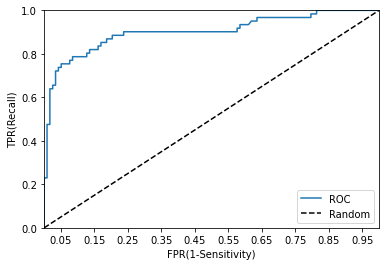

In [30]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곘값에 따른 FPR, TPR 값을 반환 받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label="ROC")
    # 가운데 대각선 직선을 그림.
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정
    start, end, = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [31]:
from sklearn.metrics import roc_auc_score

### roc_auc_score()의 인자 수정 사항
### roc_auc_score(y_test, pred)로 예측 타겟값을 입력했으나,
### roc_auc_score(y_test, y_score)로 y_score는 predict_proba()로 호출된 예측 확률 ndarray 중 positive열에 해당하는 array

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print("ROC AUC 값: {0:.4f}".format(roc_score))

ROC AUC 값: 0.9024
